In [2]:
import xlrd
import xlwt
import numpy as np
data = xlrd.open_workbook('data_sep.xls')

pre_result=[]
for x in range(4918,5462):
    one_result=[]
#    row =table.row_values(x)
    for i in range(0,12):
        table = data.sheets()[i]
        one_result.append(table.cell(x,14).value)
    pre_result.append(one_result)

pre_results=np.array(pre_result)
print(pre_results)
print(pre_results[0])

[['4' '4' '0' ... '0' '0' '0']
 ['3' '3' '3' ... '3' '3' '2']
 ['4' '4' '0' ... '0' '0' '0']
 ...
 ['4' '4' '0' ... '0' '0' '0']
 ['4' '4' '0' ... '0' '0' '0']
 ['4' '4' '0' ... '0' '0' '0']]
['4' '4' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']


In [3]:
f=xlwt.Workbook()
row0 = ["month","grade"]
sheet1=f.add_sheet('User1',cell_overwrite_ok=True)
for c in range(0,2):
    sheet1.write(0,c,row0[c]) 
    
for i in range(1,13):
    sheet1.write(i,0,i)
    
for j in range (1,13):
    sheet1.write(j,1,pre_results[0][j-1])

f.save('user_grade.xls')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
 
user1 = pd.read_excel('user_grade.xls')
user1 = DataFrame(user1)
user1.head()

D:\Anaconda\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,month,grade
0,1,4
1,2,4
2,3,0
3,4,0
4,5,0


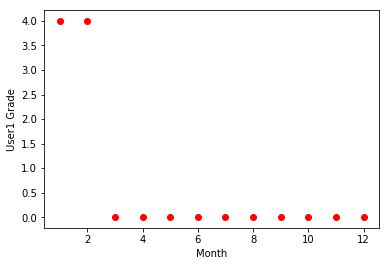

In [4]:
#scatter plot
plt.scatter(user1.month,user1.grade,color = 'red',label = "user1")
plt.xlabel("Month")
plt.ylabel("User1 Grade")
plt.show()

#user1 = pre_results[0]
#month=[1,2,3,4,5,6,7,8,9,10,11,12]

#plt.plot(month,user1, 'ro')
#plt.xlabel("Month")
#plt.ylabel("User1 Grade")
#plt.show()

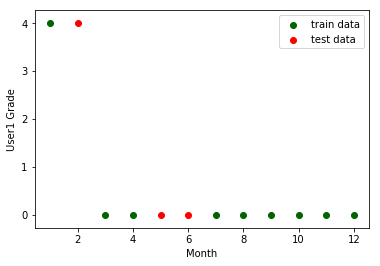

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(user1.month,user1.grade,train_size=0.8)

plt.scatter(X_train, Y_train, color="darkgreen", label="train data")
plt.scatter(X_test, Y_test, color="red", label="test data")
 
plt.legend(loc=1)
plt.xlabel("Month")
plt.ylabel("User1 Grade")
plt.show()

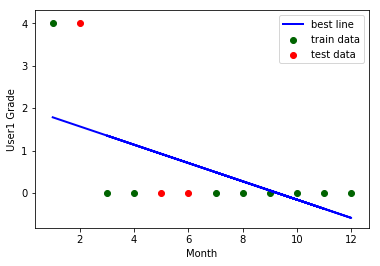

Fitting parameters: intercept 1.9999999999999996 ,regression coefficient： [-0.21538462]
Best Fitting Line: Y =  2.0 + -0.22 * X


In [7]:
model = LinearRegression()

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
 
model.fit(X_train,Y_train)
 
a  = model.intercept_
b = model.coef_
 
y_train_pred = model.predict(X_train)
plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
 
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")

plt.legend(loc=1)
plt.xlabel("Month")
plt.ylabel("User1 Grade")
plt.show()
 
print("Fitting parameters: intercept",a,",regression coefficient：",b)
print("Best Fitting Line: Y = ",round(a,2),"+",round(b[0],2),"* X")

cost:  2.6180832
W： [[-0.14391834  0.13006616  0.5424655   0.5843612  -0.6743386   0.31244984
  -0.74233174  0.5401836  -0.08524445  0.48867765]]  b:  [ 0.05265851  0.19742832 -0.13561505  0.0264616  -0.18663651 -0.03117295
 -0.03608709  0.0946072  -0.13917738  0.02024307]
4


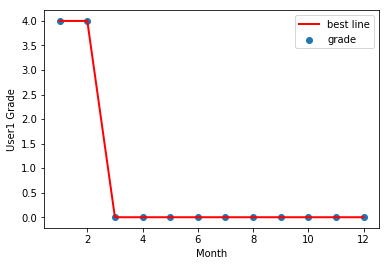

In [8]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()

model.add(Dense(units=10, input_dim=1))
model.add(Activation('tanh'))
model.add(Dense(units=1))
model.add(Activation('tanh'))

sgd = SGD(lr=0.3)

model.compile(optimizer=sgd, loss='mse')

for step in range(3):
    cost = model.train_on_batch(user1.month,user1.grade)
    if step % 6 == 0:
        print('cost: ', cost)

W, b = model.layers[0].get_weights()
print('W：', W, ' b: ', b)
print(len(model.layers))

y_pred = model.predict(user1.month)

plt.scatter(user1.month,user1.grade)
plt.plot(user1.month,user1.grade, 'r-', lw=2, label="best line")
plt.legend(loc=1)
plt.xlabel("Month")
plt.ylabel("User1 Grade")
plt.show()


In [20]:
u1 = pre_results[0]
WA_result=(int(u1[0])*1+int(u1[1])*2+int(u1[2])*3+int(u1[3])*4+int(u1[4])*5+int(u1[5])*6+int(u1[6])*7+
           int(u1[7])*8+int(u1[8])*9+int(u1[9])*10+int(u1[10])*11+int(u1[11])*12)/98
print("Result of weighted average is",WA_result)
print("The user grade prediction of the first user by weighted average is ", round(WA_result))

Result of weighted average is 0.12244897959183673
The user grade prediction of the first user by weighted average is  0
